In [1]:
# Data Set: https://data.torontopolice.on.ca/datasets/0a239a5563a344a3bbf8452504ed8d68_0/explore?location=20.543878%2C-39.819624%2C3.50

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [3]:
df= pd.read_csv("Major_Crime_Indicators_Open_Data.csv")

In [4]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.809036e+06,5.431523e+06,1,GO-20141260264,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,143,West Rouge,131,Rouge (131),-79.132915,43.780413
1,-8.814320e+06,5.435514e+06,2,GO-20141260033,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,144,Morningside Heights,131,Rouge (131),-79.180387,43.806289
2,-8.832825e+06,5.419631e+06,3,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1420,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
3,-8.847292e+06,5.429042e+06,4,GO-20141264084,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,1420,110,Assault Bodily Harm,Assault,27,York University Heights,27,York University Heights (27),-79.476579,43.764317
4,6.327780e-09,5.664924e-09,5,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000


In [5]:
# Display the names of the columns
for col in df.columns:
    print(col)
col_no = df.shape[1]
print(col_no)

X
Y
OBJECTID
EVENT_UNIQUE_ID
REPORT_DATE
OCC_DATE
REPORT_YEAR
REPORT_MONTH
REPORT_DAY
REPORT_DOY
REPORT_DOW
REPORT_HOUR
OCC_YEAR
OCC_MONTH
OCC_DAY
OCC_DOY
OCC_DOW
OCC_HOUR
DIVISION
LOCATION_TYPE
PREMISES_TYPE
UCR_CODE
UCR_EXT
OFFENCE
MCI_CATEGORY
HOOD_158
NEIGHBOURHOOD_158
HOOD_140
NEIGHBOURHOOD_140
LONG_WGS84
LAT_WGS84
31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372899 entries, 0 to 372898
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  372899 non-null  float64
 1   Y                  372899 non-null  float64
 2   OBJECTID           372899 non-null  int64  
 3   EVENT_UNIQUE_ID    372899 non-null  object 
 4   REPORT_DATE        372899 non-null  object 
 5   OCC_DATE           372899 non-null  object 
 6   REPORT_YEAR        372899 non-null  int64  
 7   REPORT_MONTH       372899 non-null  object 
 8   REPORT_DAY         372899 non-null  int64  
 9   REPORT_DOY         372899 non-null  int64  
 10  REPORT_DOW         372899 non-null  object 
 11  REPORT_HOUR        372899 non-null  int64  
 12  OCC_YEAR           372788 non-null  float64
 13  OCC_MONTH          372788 non-null  object 
 14  OCC_DAY            372788 non-null  float64
 15  OCC_DOY            372788 non-null  float64
 16  OC

In [30]:
# Check for missing values

missing_val=df.isnull().sum()
missing_val

EVENT_UNIQUE_ID        0
REPORT_DATE            0
OCC_DATE               0
REPORT_YEAR            0
REPORT_MONTH           0
REPORT_DAY             0
REPORT_DOY             0
REPORT_DOW             0
REPORT_HOUR            0
OCC_YEAR             111
OCC_MONTH            111
OCC_DAY              111
OCC_DOY              111
OCC_DOW              111
OCC_HOUR               0
DIVISION               0
LOCATION_TYPE          0
PREMISES_TYPE          0
UCR_CODE               0
UCR_EXT                0
OFFENCE                0
MCI_CATEGORY           0
HOOD_158               0
NEIGHBOURHOOD_158      0
HOOD_140               0
NEIGHBOURHOOD_140      0
LONG_WGS84             0
LAT_WGS84              0
dtype: int64

In [31]:
# Perform backward fill to fill the missing values as it is year, month and day so other imputing methods won't make sense

df['OCC_YEAR'] = df['OCC_YEAR'].fillna(method='bfill')
df['OCC_MONTH'] = df['OCC_MONTH'].fillna(method='bfill')
df['OCC_DAY'] = df['OCC_DAY'].fillna(method='bfill')
df['OCC_DOY'] = df['OCC_DOY'].fillna(method='bfill')
df['OCC_DOW'] = df['OCC_DOW'].fillna(method='bfill')

In [28]:
# Display the correlation matrix to check the correlation between the columns

corr_matrix = df.corr()

In [7]:
#Remove the two extra column and set ObjectId as index column

df = df.drop(columns=['X','Y'])
df.set_index('OBJECTID', inplace=True)

In [8]:
# Checking the values of the column

column_values = df.MCI_CATEGORY
print(column_values)

# Value counts for each unique value
value_counts = df['MCI_CATEGORY'].value_counts()
print(value_counts)


OBJECTID
1                 Assault
2                 Assault
3                 Assault
4                 Assault
5                 Robbery
               ...       
372895            Assault
372896    Break and Enter
372897            Robbery
372898            Assault
372899            Assault
Name: MCI_CATEGORY, Length: 372899, dtype: object
Assault            197906
Break and Enter     70148
Auto Theft          58441
Robbery             33921
Theft Over          12483
Name: MCI_CATEGORY, dtype: int64


In [11]:
# Function to map MCI_CATEGORY to a binary indicator for crime committed

def map_crime_category(category):
    if category in ['Assault', 'Break and Enter', 'Robbery', 'Theft Over','Auto Theft']:
        return 1  # Crime committed
    else:
        return 0  # No crime committed

# Create the 'crime_committed' column based on 'MCI_CATEGORY'

df['crime_committed'] = df['MCI_CATEGORY'].apply(map_crime_category)




In [13]:
# Display the updated DataFrame with the new 'crime_committed' 
df.head()

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,...,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,crime_committed
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,GO-20141260264,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,Wednesday,1,2014.0,...,100,Assault,Assault,143,West Rouge,131,Rouge (131),-79.132915,43.780413,1
2,GO-20141260033,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,Wednesday,2,2013.0,...,100,Assault,Assault,144,Morningside Heights,131,Rouge (131),-79.180387,43.806289,1
3,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,Wednesday,0,2014.0,...,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234,1
4,GO-20141264084,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,Wednesday,22,2013.0,...,110,Assault Bodily Harm,Assault,27,York University Heights,27,York University Heights (27),-79.476579,43.764317,1
5,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,Wednesday,4,2014.0,...,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000,1


In [17]:
# Selecting the independent variables

X = df[['REPORT_MONTH', 'REPORT_DAY', 'REPORT_HOUR', 'OCC_MONTH', 'OCC_DAY', 'OCC_HOUR',
             'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84',
                    'OFFENCE', 'MCI_CATEGORY', 'UCR_CODE', 'UCR_EXT']]

Y= df['crime_committed']

In [19]:
X

,REPORT_MONTH,REPORT_DAY,REPORT_HOUR,OCC_MONTH,OCC_DAY,OCC_HOUR,NEIGHBOURHOOD_158,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,OFFENCE,MCI_CATEGORY,UCR_CODE,UCR_EXT
OBJECTID,,,,,,,,,,,,,,
1,January,1,1,January,1.0,1,West Rouge,Rouge (131),-79.132915,43.780413,Assault,Assault,1430,100
2,January,1,2,December,31.0,22,Morningside Heights,Rouge (131),-79.180387,43.806289,Assault,Assault,1430,100
3,January,1,0,January,1.0,0,Thorncliffe Park,Thorncliffe Park (55),-79.346615,43.703234,Assault With Weapon,Assault,1420,100
4,January,1,22,December,31.0,21,York University Heights,York University Heights (27),-79.476579,43.764317,Assault Bodily Harm,Assault,1420,110
5,January,1,4,January,1.0,2,NSA,NSA,0.000000,0.000000,Robbery - Swarming,Robbery,1610,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372895,December,31,13,December,31.0,13,Thorncliffe Park,Thorncliffe Park (55),-79.346615,43.703234,Assault,Assault,1430,100
372896,December,31,12,December,31.0,12,Annex,Annex (95),-79.394825,43.675083,B&E,Break and Enter,2120,200
372897,December,31,14,December,31.0,14,Black Creek,Black Creek (24),-79.518742,43.769232,Robbery With Weapon,Robbery,1610,100


In [20]:
Y

OBJECTID
1         1
2         1
3         1
4         1
5         1
         ..
372895    1
372896    1
372897    1
372898    1
372899    1
Name: crime_committed, Length: 372899, dtype: int64

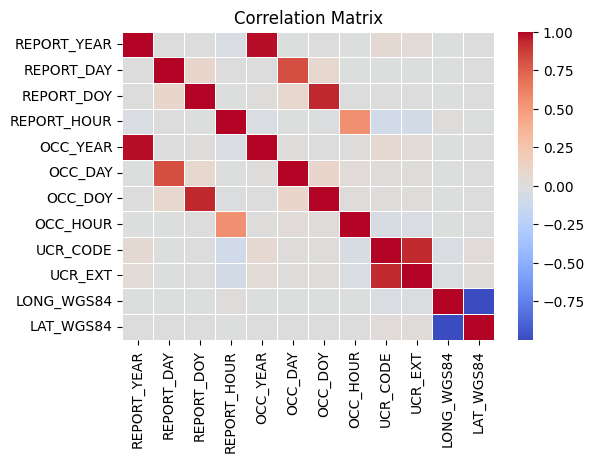

In [29]:
# Plot the matrix

# In this example, annot=True has been removed because annotations are not needed. If you do need annotations, ensure that the annot argument is correctly specified with a 2D array-like object of the same shape as corr_matrix.

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Data Preprocessing





In [32]:
#Check for missing values to make sure the imputation is done. No more null values in columns

missing_val1=df.isnull().sum()
missing_val1

EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOY              0
OCC_DOW              0
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

In [14]:
# Convert categorical columns to numeric with label encoding

from sklearn.preprocessing import LabelEncoder

# List of categorical columns

cat_col = ['REPORT_MONTH','REPORT_DOW','OFFENCE', 'MCI_CATEGORY', 'NEIGHBOURHOOD_158','NEIGHBOURHOOD_140']

In [15]:
#Initialize label encoder

label_encoder =LabelEncoder()

# Perform label encoding for categorical variables

for col in cat_col:
    df[col]=label_encoder.fit_transform(df[col])


In [16]:
# Check if it has been converted to numeric

df.head()

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,GO-20141260264,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,4,1,1,6,1,2014.0,...,1430,100,5,0,143,142,131,106,-79.132915,43.780413
2,GO-20141260033,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,4,1,1,6,2,2013.0,...,1430,100,5,0,144,92,131,106,-79.180387,43.806289
3,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,4,1,1,6,0,2014.0,...,1420,100,11,0,55,134,55,119,-79.346615,43.703234
4,GO-20141264084,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,4,1,1,6,22,2013.0,...,1420,110,8,0,27,157,27,139,-79.476579,43.764317
5,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,4,1,1,6,4,2014.0,...,1610,180,32,3,NSA,97,NSA,84,0.000000,0.000000
